In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pmdarima import auto_arima
from prophet import Prophet
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
raw_pjme = pd.read_csv("../data/raw/PJME_hourly.csv", index_col=[0],parse_dates=[0])

In [3]:
raw_pjme.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [4]:
raw_pjme = raw_pjme.sort_index()

In [5]:
if raw_pjme.index.duplicated().any():
    raw_pjme = raw_pjme.groupby(level=0).mean().sort_index()

In [6]:
raw_pjme = raw_pjme.asfreq("h")

In [7]:
print(raw_pjme.isna().sum())

PJME_MW    30
dtype: int64


In [8]:
raw_pjme["PJME_MW"] = raw_pjme["PJME_MW"].interpolate()

In [9]:
raw_pjme.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145392 entries, 2002-01-01 01:00:00 to 2018-08-03 00:00:00
Freq: h
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145392 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [10]:
print(raw_pjme.isna().sum())

PJME_MW    0
dtype: int64


<Axes: xlabel='Datetime', ylabel='PJME_MW'>

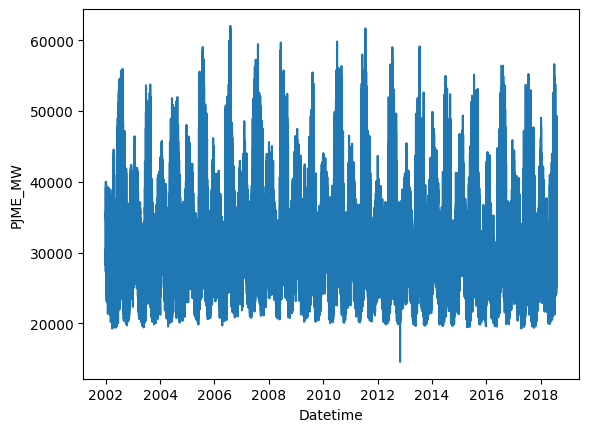

In [11]:
sns.lineplot(x=raw_pjme.index, y=raw_pjme["PJME_MW"])

In [22]:
train_raw_pjme = raw_pjme[:int(len(raw_pjme)*0.8)]
test_raw_pjme = raw_pjme[int(len(raw_pjme)*0.8):]

In [23]:
train_raw_pjme.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116313 entries, 2002-01-01 01:00:00 to 2015-04-09 09:00:00
Freq: h
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  116313 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [24]:
test_raw_pjme.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29079 entries, 2015-04-09 10:00:00 to 2018-08-03 00:00:00
Freq: h
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PJME_MW  29079 non-null  float64
dtypes: float64(1)
memory usage: 454.4 KB


04:52:05 - cmdstanpy - INFO - Chain [1] start processing
04:54:14 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='ds', ylabel='y'>

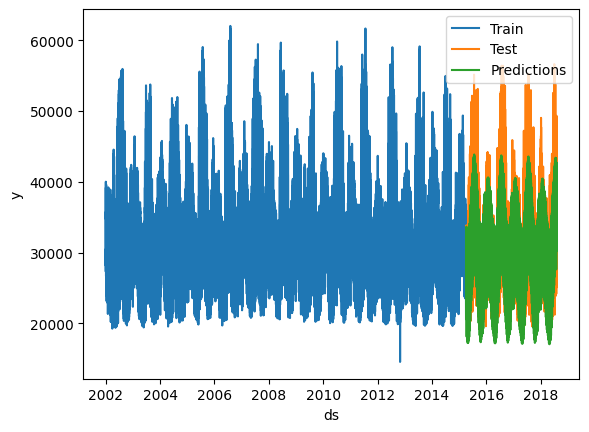

In [25]:
model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        seasonality_mode="multiplicative"
    )

train_raw_pjme = train_raw_pjme.reset_index()
test_raw_pjme = test_raw_pjme.reset_index()

train_raw_pjme.columns = ["ds", "y"]
test_raw_pjme.columns = ["ds", "y"]

train_raw_pjme["ds"] = pd.to_datetime(train_raw_pjme['ds'])
test_raw_pjme["ds"] = pd.to_datetime(test_raw_pjme['ds'])
                                    
model.fit(train_raw_pjme)
predictions = model.predict(test_raw_pjme)
y_pred = predictions['yhat'].values
    
mae = mean_absolute_error(test_raw_pjme['y'], y_pred)
mape = mean_absolute_percentage_error(test_raw_pjme['y'], y_pred)
mse = mean_squared_error(test_raw_pjme['y'], y_pred)
rmse = np.sqrt(mse)


sns.lineplot(x='ds', y='y', data=train_raw_pjme, label='Train')
sns.lineplot(x='ds', y='y', data=test_raw_pjme, label='Test')
sns.lineplot(x=test_raw_pjme['ds'], y=y_pred, label='Predictions')



In [26]:
train_raw_pjme = raw_pjme[:int(len(raw_pjme)*0.8)]
test_raw_pjme = raw_pjme[int(len(raw_pjme)*0.8):]

04:54:35 - cmdstanpy - INFO - Chain [1] start processing
04:55:43 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='ds', ylabel='y'>

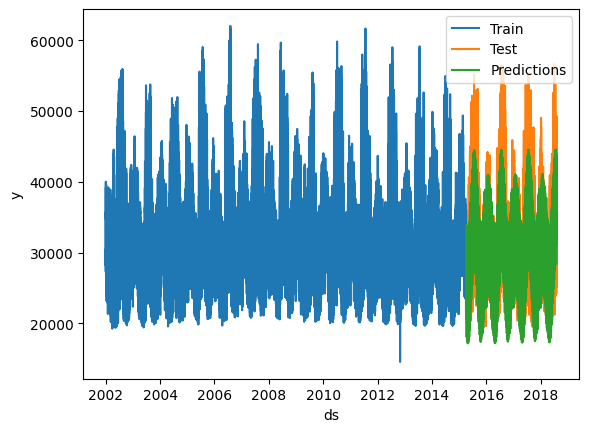

In [27]:
model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        seasonality_mode="additive"
    )

train_raw_pjme = train_raw_pjme.reset_index()
test_raw_pjme = test_raw_pjme.reset_index()

train_raw_pjme.columns = ["ds", "y"]
test_raw_pjme.columns = ["ds", "y"]

train_raw_pjme["ds"] = pd.to_datetime(train_raw_pjme['ds'])
test_raw_pjme["ds"] = pd.to_datetime(test_raw_pjme['ds'])
                                    
model.fit(train_raw_pjme)
predictions = model.predict(test_raw_pjme)
y_pred = predictions['yhat'].values
    
mae = mean_absolute_error(test_raw_pjme['y'], y_pred)
mape = mean_absolute_percentage_error(test_raw_pjme['y'], y_pred)
mse = mean_squared_error(test_raw_pjme['y'], y_pred)
rmse = np.sqrt(mse)


sns.lineplot(x='ds', y='y', data=train_raw_pjme, label='Train')
sns.lineplot(x='ds', y='y', data=test_raw_pjme, label='Test')
sns.lineplot(x=test_raw_pjme['ds'], y=y_pred, label='Predictions')



In [28]:
train_raw_pjme = raw_pjme[:int(len(raw_pjme)*0.8)]
test_raw_pjme = raw_pjme[int(len(raw_pjme)*0.8):]

04:56:43 - cmdstanpy - INFO - Chain [1] start processing
04:57:50 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='ds', ylabel='y'>

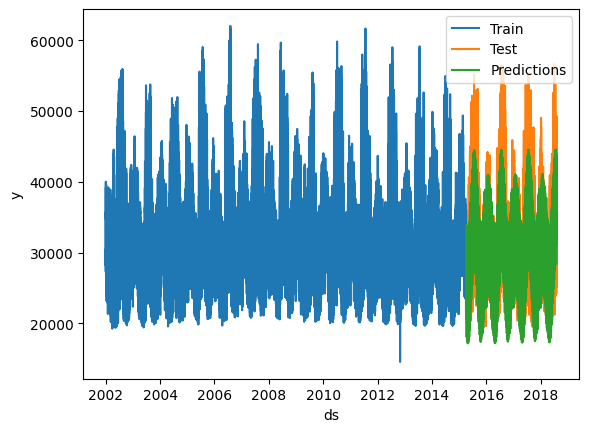

In [29]:
model = Prophet(
        seasonality_mode="additive"
    )

train_raw_pjme = train_raw_pjme.reset_index()
test_raw_pjme = test_raw_pjme.reset_index()

train_raw_pjme.columns = ["ds", "y"]
test_raw_pjme.columns = ["ds", "y"]

train_raw_pjme["ds"] = pd.to_datetime(train_raw_pjme['ds'])
test_raw_pjme["ds"] = pd.to_datetime(test_raw_pjme['ds'])
                                    
model.fit(train_raw_pjme)
predictions = model.predict(test_raw_pjme)
y_pred = predictions['yhat'].values
    
mae = mean_absolute_error(test_raw_pjme['y'], y_pred)
mape = mean_absolute_percentage_error(test_raw_pjme['y'], y_pred)
mse = mean_squared_error(test_raw_pjme['y'], y_pred)
rmse = np.sqrt(mse)


sns.lineplot(x='ds', y='y', data=train_raw_pjme, label='Train')
sns.lineplot(x='ds', y='y', data=test_raw_pjme, label='Test')
sns.lineplot(x=test_raw_pjme['ds'], y=y_pred, label='Predictions')



In [37]:
train_raw_pjme = raw_pjme[:int(len(raw_pjme)*0.8)]
test_raw_pjme = raw_pjme[int(len(raw_pjme)*0.8):]

<Axes: xlabel='Datetime', ylabel='PJME_MW'>

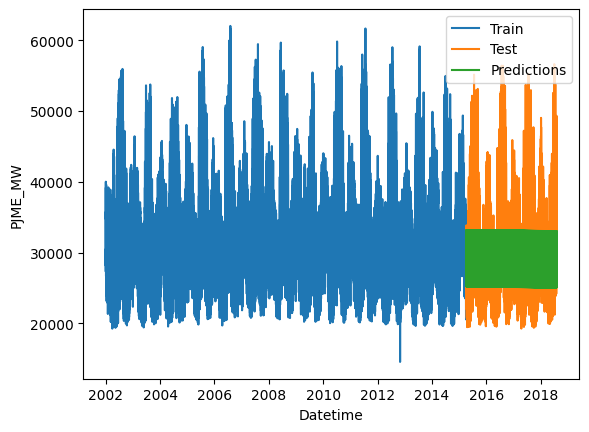

In [40]:
model = ExponentialSmoothing(train_raw_pjme['PJME_MW'], trend='add', seasonal='add', seasonal_periods=24,initialization_method="estimated").fit()

predictions = model.forecast(len(test_raw_pjme['PJME_MW']))

mae = mean_absolute_error(test_raw_pjme['PJME_MW'], predictions)
mape = mean_absolute_percentage_error(test_raw_pjme['PJME_MW'], predictions)
mse = mean_squared_error(test_raw_pjme['PJME_MW'], predictions)
rmse = np.sqrt(mse)


sns.lineplot(x=train_raw_pjme.index, y='PJME_MW', data=train_raw_pjme, label='Train')
sns.lineplot(x=test_raw_pjme.index, y='PJME_MW', data=test_raw_pjme, label='Test')
sns.lineplot(x=test_raw_pjme.index, y=predictions, label='Predictions')


In [41]:
train_raw_pjme = raw_pjme[:int(len(raw_pjme)*0.8)]
test_raw_pjme = raw_pjme[int(len(raw_pjme)*0.8):]

In [ ]:
model = auto_arima(train_raw_pjme['PJME_MW'], trace=False, seasonal=True,m=24,approximation=False)

predictions = model.predict(n_periods=len(test_raw_pjme))

mae = mean_absolute_error(test_raw_pjme['PJME_MW'], predictions)
mape = mean_absolute_percentage_error(test_raw_pjme['PJME_MW'], predictions)
mse = mean_squared_error(test_raw_pjme['PJME_MW'], predictions)
rmse = np.sqrt(mse)


sns.lineplot(x=train_raw_pjme.index, y='PJME_MW', data=train_raw_pjme, label='Train')
sns.lineplot(x=test_raw_pjme.index, y='PJME_MW', data=test_raw_pjme, label='Test')
sns.lineplot(x=test_raw_pjme.index, y=predictions, label='Predictions')


/home/joe/Documents/DsrpTrabajoFinalMLE2/dsrptrabajofinalmle2/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/joe/Documents/DsrpTrabajoFinalMLE2/dsrptrabajofinalmle2/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/joe/Documents/DsrpTrabajoFinalMLE2/dsrptrabajofinalmle2/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/joe/Documents/DsrpTrabajoFinalMLE2/dsrptrabajofinalmle2/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warning